<a href="https://colab.research.google.com/github/SanskarGithub07/Statistics_Project/blob/main/apple_stock_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
import numpy
import pandas as pd

'2.3.0+cu121'

In [40]:
FILE_PATH = "appleCsv.csv"
df = pd.read_csv(FILE_PATH)
print(df.head())

             timestamp    open    high      low   close  volume
0  2024-05-24 19:59:00  190.09  190.09  189.950  189.95     487
1  2024-05-24 19:58:00  190.03  190.09  189.930  190.09     487
2  2024-05-24 19:57:00  190.01  190.03  189.930  190.03     782
3  2024-05-24 19:56:00  190.01  190.02  190.000  190.01     511
4  2024-05-24 19:55:00  189.97  190.00  189.935  190.00     454


In [41]:
len(df)

20090

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20090 entries, 0 to 20089
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  20090 non-null  object 
 1   open       20090 non-null  float64
 2   high       20090 non-null  float64
 3   low        20090 non-null  float64
 4   close      20090 non-null  float64
 5   volume     20090 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 941.8+ KB


In [43]:
df.describe()

,open,high,low,close,volume
count,20090.000000,20090.000000,20090.000000,20090.000000,2.009000e+04
mean,183.405636,183.476618,183.295893,183.404263,7.100262e+04
std,7.246244,7.241909,7.289223,7.241772,5.290749e+05
min,162.700000,169.062000,158.007000,165.840000,1.000000e+00
25%,181.545000,181.595000,181.404750,181.544000,3.100000e+02
50%,184.632500,184.715000,184.549500,184.630000,3.415000e+03
75%,189.857250,189.890000,189.810000,189.855000,7.139150e+04
max,202.414000,203.401000,192.721000,203.401000,3.449607e+07


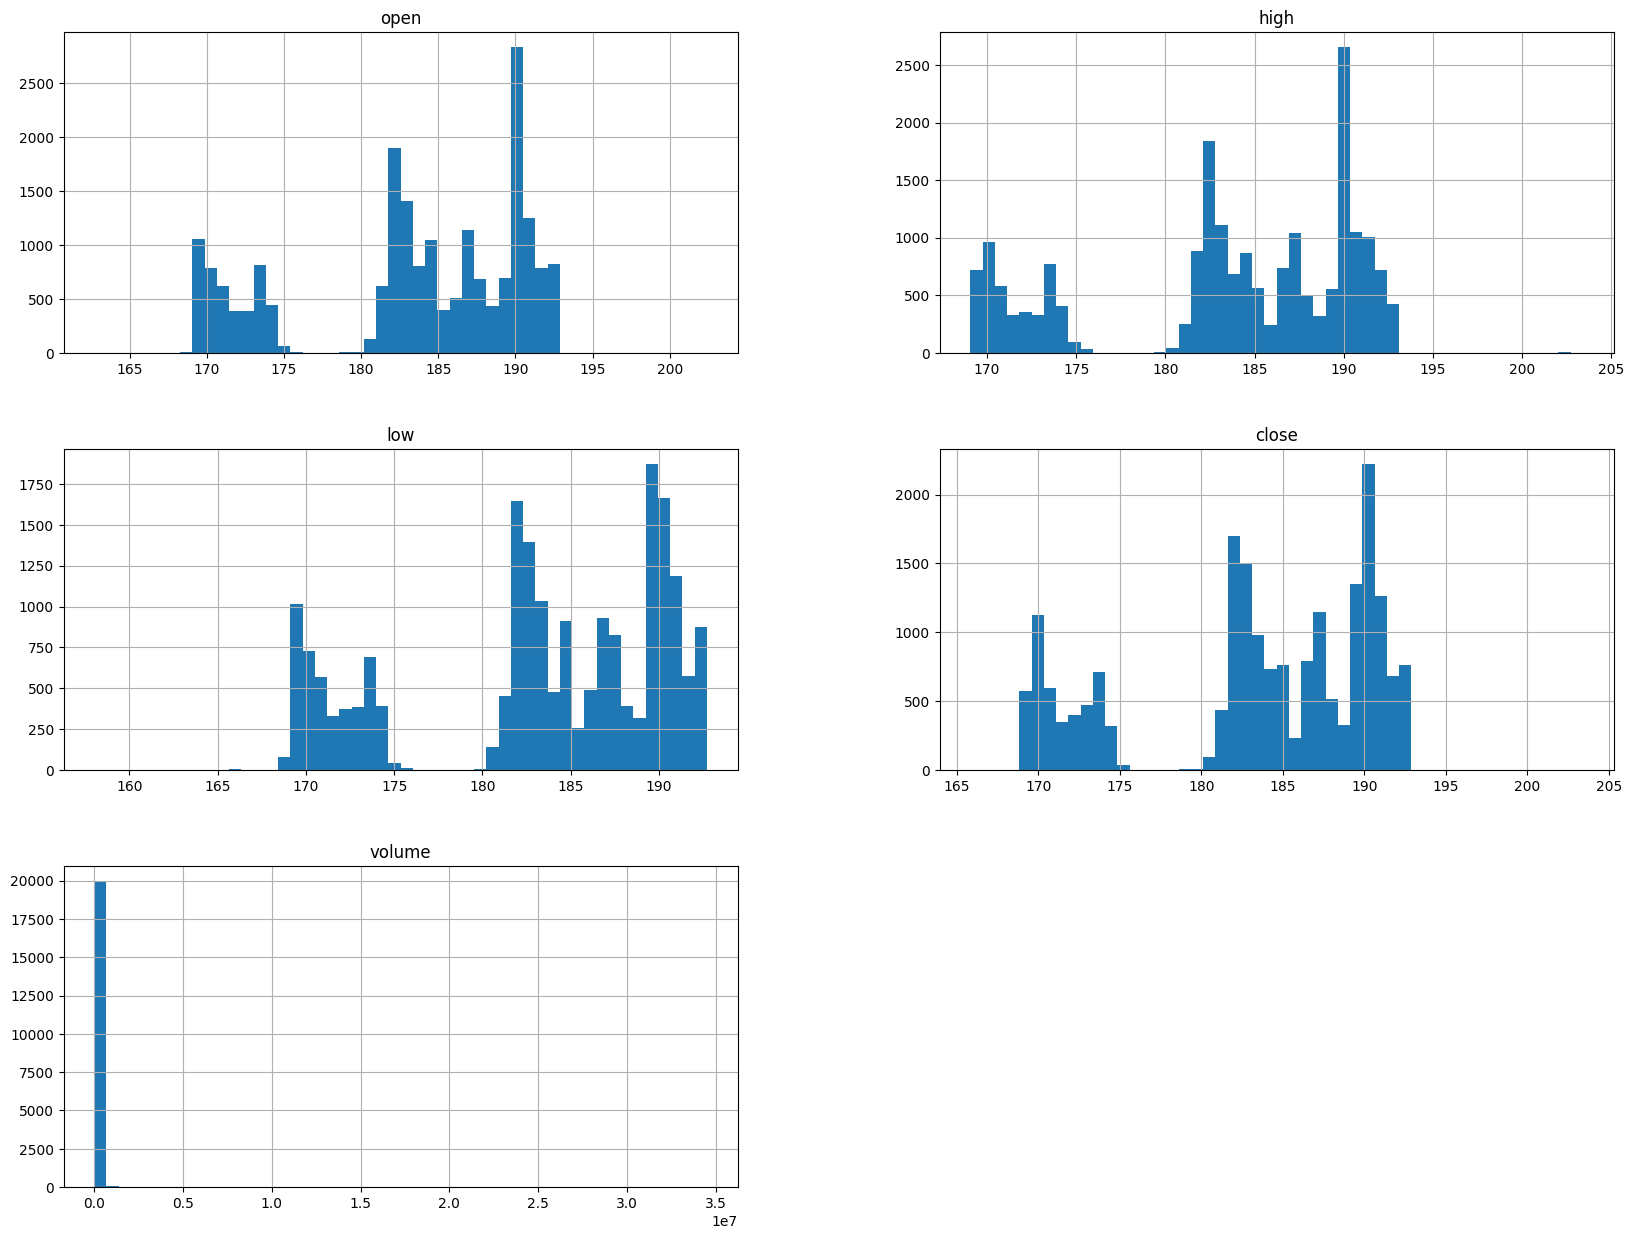

In [44]:
df.hist(bins = 50, figsize = (20, 15))
plt.show()

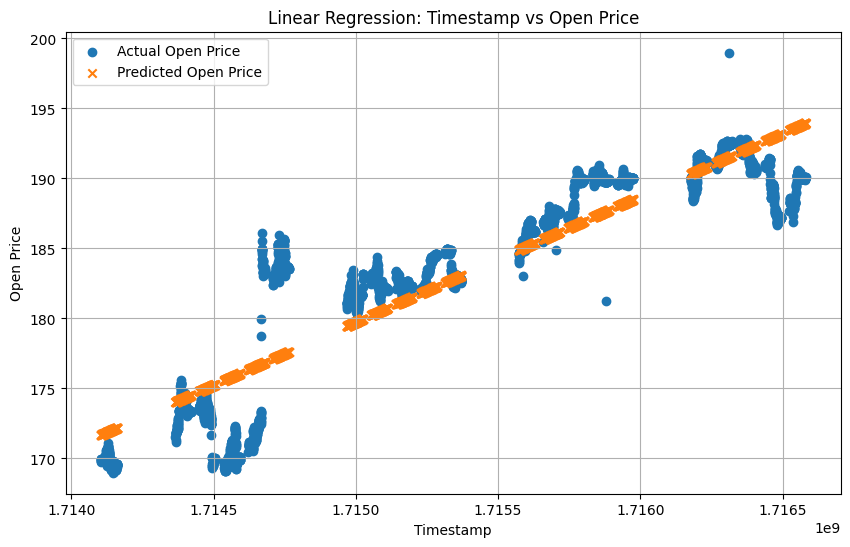

Intercept: -15243.993631304294
Coefficient: 8.993428047827237e-06


In [45]:
# Splitting data into test and train set
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from datetime import datetime

# Converting timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Converting timestamp to Unix epoch time for numerical analysis
df['timestamp_numeric'] = df['timestamp'].apply(lambda x: x.timestamp())

X_train, X_test, y_train, y_test = train_test_split(df['timestamp_numeric'].values.reshape(-1, 1), df['open'], test_size = 0.2, random_state = 42);

#Training the linear regression model
# model = DecisionTreeRegressor()
model = LinearRegression()
model.fit(X_train, y_train)

y_preds = model.predict(X_test)

# Visualizing the results of the model
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label='Actual Open Price', alpha=1)
plt.scatter(X_test, y_preds, label='Predicted Open Price', alpha=1, marker='x')
plt.xlabel('Timestamp')
plt.ylabel('Open Price')
plt.title('Linear Regression: Timestamp vs Open Price')
plt.legend()
plt.grid(True)
plt.show()

# Printing the coefficients of the linear regression model
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])